In [2]:
import  pandas as pd
import re
from datetime import datetime

C:\Users\santh\AppData\Local\Temp\ipykernel_52600\2939713501.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import  pandas as pd


In [6]:
df = pd.read_csv("data/NASA Battery Experiment data/metadata.csv")
df.head()

,type,start_time,ambient_temperature,battery_id,test_id,uid,filename,Capacity,Re,Rct
0,discharge,[2010. 7. 21. 15. 0. ...,4,B0047,0,1,00001.csv,1.6743047446975208,NaN,NaN
1,impedance,[2010. 7. 21. 16. 53. ...,24,B0047,1,2,00002.csv,NaN,0.05605783343888099,0.20097016584458333
2,charge,[2010. 7. 21. 17. 25. ...,4,B0047,2,3,00003.csv,NaN,NaN,NaN
3,impedance,[2010 7 21 20 31 5],24,B0047,3,4,00004.csv,NaN,0.05319185850921101,0.16473399914864734
4,discharge,[2.0100e+03 7.0000e+00 2.1000e+01 2.1000e+01 2...,4,B0047,4,5,00005.csv,1.5243662105099023,NaN,NaN


In [7]:
# Function to convert string to datetime object
def convert_to_datetime(input_string):
    components = input_string.strip('[]').split(' ')
    components = re.split(r'\s+', input_string.strip('[]'))
    components = [float(component) if '.' in component else int(component) for component in components]
    return datetime(*map(int, components))

# Apply the function to the 'start_time' column
df['start_time'] = df['start_time'].apply(convert_to_datetime)

# df.to_excel('timestamp_updated.xlsx')

In [27]:
df

,type,start_time,ambient_temperature,battery_id,test_id,uid,filename,Capacity,Re,Rct
0,discharge,2010-07-21 15:00:35,4,B0047,0,1,00001.csv,1.6743047446975208,NaN,NaN
1,impedance,2010-07-21 16:53:45,24,B0047,1,2,00002.csv,NaN,0.05605783343888099,0.20097016584458333
2,charge,2010-07-21 17:25:40,4,B0047,2,3,00003.csv,NaN,NaN,NaN
3,impedance,2010-07-21 20:31:05,24,B0047,3,4,00004.csv,NaN,0.05319185850921101,0.16473399914864734
4,discharge,2010-07-21 21:02:56,4,B0047,4,5,00005.csv,1.5243662105099023,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
7560,impedance,2010-09-30 07:36:45,24,B0055,247,7561,07561.csv,NaN,0.0968087979207628,0.15489738203707232
7561,discharge,2010-09-30 08:08:36,4,B0055,248,7562,07562.csv,1.0201379996149256,NaN,NaN
7562,charge,2010-09-30 08:48:54,4,B0055,249,7563,07563.csv,NaN,NaN,NaN
7563,discharge,2010-09-30 11:50:17,4,B0055,250,7564,07564.csv,0.9907591663373165,NaN,NaN


In [21]:
charge_df = df.loc[df["type"] == "charge"]
discharge_df = df.loc[df["type"] == "discharge"]
impedance_df = df.loc[df["type"] == "impedance"]


In [22]:
#removing unwanted columns
discharge_df = discharge_df[['start_time', 'ambient_temperature', 'battery_id', 'test_id','uid', 'filename', 'Capacity']]

discharge_df.head()

,start_time,ambient_temperature,battery_id,test_id,uid,filename,Capacity
0,2010-07-21 15:00:35,4,B0047,0,1,00001.csv,1.6743047446975208
4,2010-07-21 21:02:56,4,B0047,4,5,00005.csv,1.5243662105099023
6,2010-07-22 01:40:06,4,B0047,6,7,00007.csv,1.5080762969973425
8,2010-07-22 06:16:21,4,B0047,8,9,00009.csv,1.4835577960067696
10,2010-07-22 10:51:48,4,B0047,10,11,00011.csv,1.4671391666146525


In [23]:
#missing values

print(discharge_df.isna().sum())

start_time             0
ambient_temperature    0
battery_id             0
test_id                0
uid                    0
filename               0
Capacity               0
dtype: int64


In [24]:
#checking incorrect data

for i in discharge_df['Capacity']:
     if i == "[]":
        print(i)
        continue
     print(i)


1.6743047446975208
1.5243662105099023
1.5080762969973425
1.4835577960067696
1.4671391666146525
1.448858156982267
1.4458534180949325
1.431118266178283
1.4192745516578533
1.3999974221808271
1.3885156686114437
1.3652234669528964
1.4060442272970963
1.4057541613525781
1.3867662881727878
1.3705053061420223
1.3497431114823601
1.3251533367939783
1.3111943869635805
0
1.3394234405932892
1.2849157142560723
1.281719159327807
1.2600051642942829
1.266070385993126
1.2413590294280803
1.2298873703485311
1.228088614506696
1.2139857189070042
1.2173435064564189
1.2073445944515917
1.18804049227045
1.186304749886542
1.2613935471028506
1.2648246158850653
1.2466494548982199
1.2333924152795082
1.2129250072037692
1.1999106597943647
1.1902559038393383
1.1892563795455853
1.167069685125939
1.1615348403090369
1.1555563844349988
1.1488524666097713
1.143572986788779
1.1418015379428537
1.136058647502255
1.1236364680969286
1.1320498900328944
1.1170101762158153
1.120043039721982
1.1059773445917063
0
1.1907902374762016
1

In [25]:
discharge_df = discharge_df.loc[discharge_df['Capacity']!='[]']
discharge_df['Capacity']

0       1.6743047446975208
4       1.5243662105099023
6       1.5080762969973425
8       1.4835577960067696
10      1.4671391666146525
               ...        
7553    1.0285269676595319
7555    0.9816844358987022
7557    1.0127121434171131
7561    1.0201379996149256
7563    0.9907591663373165
Name: Capacity, Length: 2769, dtype: object

In [26]:
# check for incorrect data type

discharge_df.dtypes

start_time             datetime64[ns]
ambient_temperature             int64
battery_id                     object
test_id                         int64
uid                             int64
filename                       object
Capacity                       object
dtype: object

In [28]:
discharge_df['Capacity'] = discharge_df['Capacity'].astype(float)


start_time             datetime64[ns]
ambient_temperature             int64
battery_id                     object
test_id                         int64
uid                             int64
filename                       object
Capacity                      float64
dtype: object

In [9]:
#discharge_df cleaning

print("Before \n ",discharge_df.dtypes)

discharge_df['Capacity'] = discharge_df['Capacity'].astype(float)


print("After \n ",discharge_df.dtypes)


Before 
  start_time             datetime64[ns]
ambient_temperature             int64
battery_id                     object
test_id                         int64
uid                             int64
filename                       object
Capacity                       object
dtype: object
After 
  start_time             datetime64[ns]
ambient_temperature             int64
battery_id                     object
test_id                         int64
uid                             int64
filename                       object
Capacity                      float64
dtype: object


In [29]:
print("Number of Duplicated Rows: ", discharge_df.duplicated().sum())

Number of Duplicated Rows:  0


In [10]:
# list of batteries

sorted(df['battery_id'].unique())

['B0005',
 'B0006',
 'B0007',
 'B0018',
 'B0025',
 'B0026',
 'B0027',
 'B0028',
 'B0029',
 'B0030',
 'B0031',
 'B0032',
 'B0033',
 'B0034',
 'B0036',
 'B0038',
 'B0039',
 'B0040',
 'B0041',
 'B0042',
 'B0043',
 'B0044',
 'B0045',
 'B0046',
 'B0047',
 'B0048',
 'B0049',
 'B0050',
 'B0051',
 'B0052',
 'B0053',
 'B0054',
 'B0055',
 'B0056']

In [11]:
# take one battery 

battery_b0005_df = discharge_df.loc[discharge_df["battery_id"] == "B0005"]

battery_b0005_df.sort_values(by="test_id")

,start_time,ambient_temperature,battery_id,test_id,uid,filename,Capacity
5123,2008-04-02 15:25:41,24,B0005,1,5122,05122.csv,1.856487
5125,2008-04-02 19:43:48,24,B0005,3,5124,05124.csv,1.846327
5221,2008-04-03 00:01:06,24,B0005,5,5126,05126.csv,1.835349
5268,2008-04-03 04:16:37,24,B0005,7,5128,05128.csv,1.835263
5270,2008-04-03 08:33:25,24,B0005,9,5130,05130.csv,1.834646
...,...,...,...,...,...,...,...
5663,2008-05-26 10:44:38,24,B0005,599,5720,05720.csv,1.293464
5667,2008-05-26 15:30:43,24,B0005,603,5724,05724.csv,1.288003
5671,2008-05-26 20:21:04,24,B0005,607,5728,05728.csv,1.287453
5674,2008-05-27 15:52:41,24,B0005,611,5732,05732.csv,1.309015


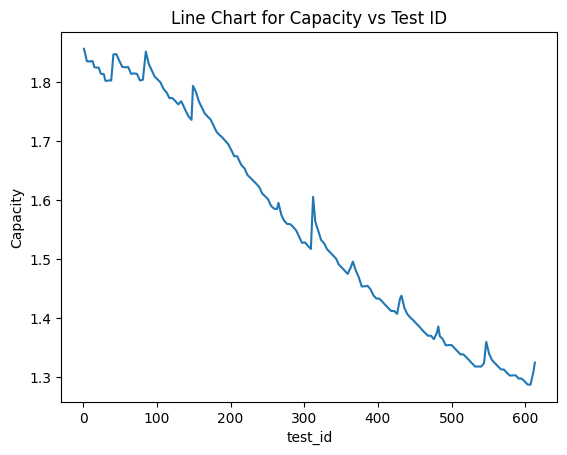

In [12]:
# battery discharge chart 

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
# Replace 'your_column_name' with the actual column name you want to visualize
sns.lineplot(x='test_id', y='Capacity', data=battery_b0005_df)

# Optionally, add labels and a title

plt.ylabel('Capacity')
plt.title('Line Chart for Capacity vs Test ID')

# Show the plot
plt.show()

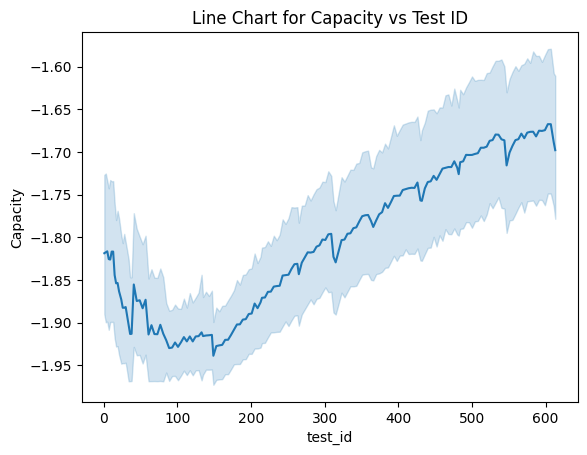

In [ ]:
# battery discharge chart 

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
# Replace 'your_column_name' with the actual column name you want to visualize
sns.lineplot(x='test_id', y='Current_measured', data=combined_df)

# Optionally, add labels and a title

plt.ylabel('Capacity')
plt.title('Line Chart for Capacity vs Test ID')

# Show the plot
plt.show()

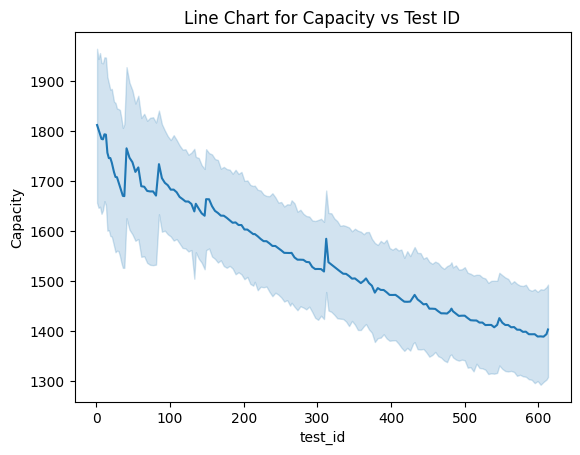

In [ ]:
# battery discharge chart 

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
# Replace 'your_column_name' with the actual column name you want to visualize
sns.lineplot(x='test_id', y='Time', data=combined_df)

# Optionally, add labels and a title

plt.ylabel('Capacity')
plt.title('Line Chart for Capacity vs Test ID')

# Show the plot
plt.show()

In [20]:
print(max(discharge_df['start_time']))
print(min(discharge_df['start_time']))

2010-09-30 15:32:33
2008-04-02 15:25:41
